In [96]:
import glob
import numpy as np

In [97]:
frds = glob.glob('output/ccx/*/*.frd')
dats = glob.glob('output/ccx/*/*.dat')

In [98]:
dats = dats[1:]
frds = frds[1:]

In [99]:
from djccx.read_dat import read_dat
from djccx.frd.readfrd import readfrd

In [100]:
params_composite ={
    "r"         :  0.297,
    "factor_radius": 2,
    "h"         :  0.35,
    "z0"        :  3.073/2,
    "density"   : 8,
    "interface_factor"  :  1.2,
    "with_interface"    : False,
    "mirror"            : True,
    "check_jacobian"    : False,
}

params_ccx = {
    "epsilon" : 0.1,
    "x_fixed" : True
}
params = {
    "mesh" : params_composite,
    "ccx"  : params_ccx,
}

In [101]:
ni = [1,2,2,2,3,3]
ni = [2,2,2,2,3,3] # Consideramos Adouble

In [102]:


def compute_E_eff(iffiles,ni):

    ancho = params_composite["z0"]*0.5 + ni*params_composite["h"]
    largo = 10 
    A = ancho*largo
    ifrd = readfrd(iffiles)
    df = ifrd["data"]
    Sapl = np.sum(df["F2"]*(df["y"] > df["y"].mean()))/A

    E_eff = Sapl / params["ccx"]["epsilon"]
    return E_eff

E_effs = [compute_E_eff(f,ini) for f,ini in zip(frds,ni)]
#E_effs = [compute_E_eff(f,ini) for f,ini in zip(frds[0:1],ni[0:1])]


In [103]:
frds

['output/ccx\\Adouble\\main.frd',
 'output/ccx\\B\\main.frd',
 'output/ccx\\C\\main.frd',
 'output/ccx\\D\\main.frd',
 'output/ccx\\E\\main.frd',
 'output/ccx\\F\\main.frd']

In [104]:
E_effs

[np.float64(3423.967256417009),
 np.float64(2454.6261550519257),
 np.float64(2401.5623019818236),
 np.float64(2387.7274438529694),
 np.float64(2125.503451964059),
 np.float64(2212.904175190251)]

In [105]:
from validation.FullExperimental import FullExperimental
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [106]:
df = FullExperimental()
df.rename(columns={"v [X,SX,Y,SY]": "delta"}, inplace=True)

# database
# layers = df["layers"].values
# layers[0] = ["Y","Y"]
# df["layers"] = layers


df.round(3)

Et [GPa]        Eb [GPa]        t [mm]         b [mm]         \
         mean    std     mean    std   mean    std    mean    std   
Name                                                                
TFP1    2.886  0.227   13.201  0.631  5.267  0.058  25.600  0.100   
TFP2    2.259  0.066    9.870  0.780  4.700  0.000  25.567  0.058   
TFP3    2.000  0.004    9.222  0.496  4.833  0.058  25.400  0.173   
TFP4    2.451  0.114   10.182  0.771  4.700  0.000  25.667  0.153   
TFP5    1.627  0.120    6.143  0.162  5.700  0.000  25.167  0.153   
TFP6    1.740  0.068    7.798  0.334  5.600  0.000  25.033  0.635   

           layers     Vc  
                          
Name                      
TFP1          [Y]  0.178  
TFP2       [Y, X]  0.164  
TFP3      [Y, SX]  0.135  
TFP4      [Y, SY]  0.144  
TFP5  [Y, SX, SY]  0.146  
TFP6   [Y, X, SY]  0.180

In [107]:
E_effs = np.array(E_effs)*1e-3
Et_exp = df["Et [GPa]"]["mean"].values

print(E_effs)
print(Et_exp)

[3.42396726 2.45462616 2.4015623  2.38772744 2.12550345 2.21290418]
[2.88550922 2.25850254 2.00043656 2.45136175 1.62658228 1.73986993]


In [108]:
error_rel = np.abs(E_effs - Et_exp)/Et_exp

In [109]:
names = df.index.values

In [110]:
Et_exp[0:1]


array([2.88550922])

In [111]:
df_pred_analy = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite\scripts\T03_FullOptimization\df_pred.csv"

df_pred = pd.read_csv(df_pred_analy)

In [112]:
Et_analitico = df_pred["Et [GPa]"].values

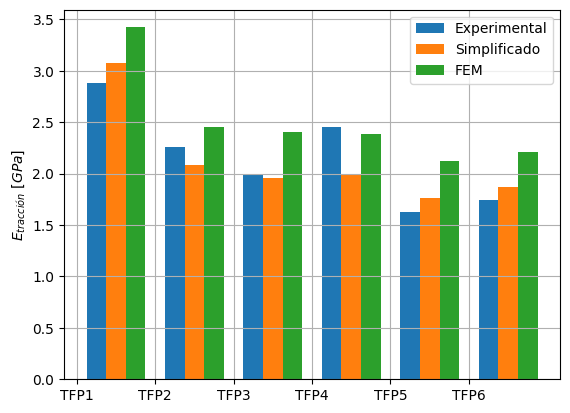

In [113]:


# bar compare 
fig, ax = plt.subplots()
width = 0.25
x = np.arange(len(E_effs))
ax.bar(x + width, Et_exp, width, label='Experimental')
ax.bar(x + 2*width, Et_analitico, width, label='Simplificado')

ax.bar(x + 3*width, E_effs, width, label='FEM')
#Et_analitico
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.legend()
plt.ylabel(r"$E_{tracción} \ [GPa]$")
plt.grid()

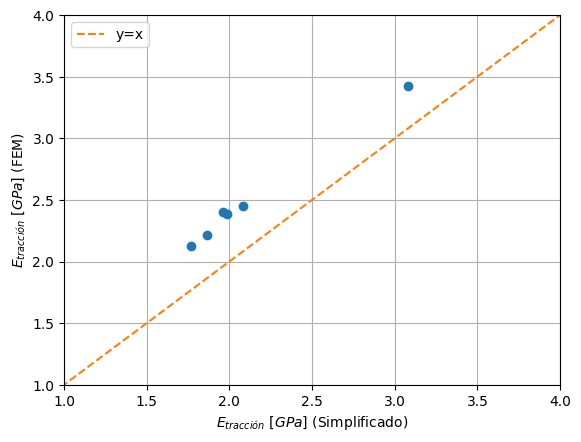

In [114]:
# fem vs analitico

plt.figure()
plt.plot(Et_analitico, E_effs, 'o')
# y =x 
xlims = plt.xlim()
ylims = plt.ylim()
plt.plot([0,100],[0,100],'--',label="y=x")  

plt.xlim(1,4)
plt.ylim(1,4)

plt.xlabel(r"$E_{tracción} \ [GPa]$ (Simplificado)")
plt.ylabel(r"$E_{tracción} \ [GPa]$ (FEM)")
plt.grid()
plt.legend()

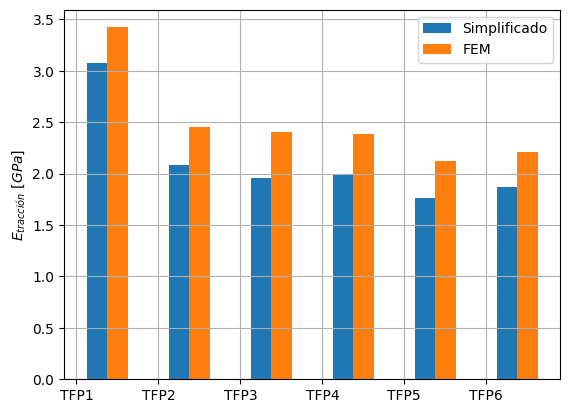

In [115]:


# bar compare 
fig, ax = plt.subplots()
width = 0.25
x = np.arange(len(E_effs))
ax.bar(x + width, Et_analitico, width, label='Simplificado')

ax.bar(x + 2*width, E_effs, width, label='FEM')
#Et_analitico
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.legend()
plt.ylabel(r"$E_{tracción} \ [GPa]$")
plt.grid()

Text(0, 0.5, '$\\varepsilon_{rel} \\ [\\%]$')

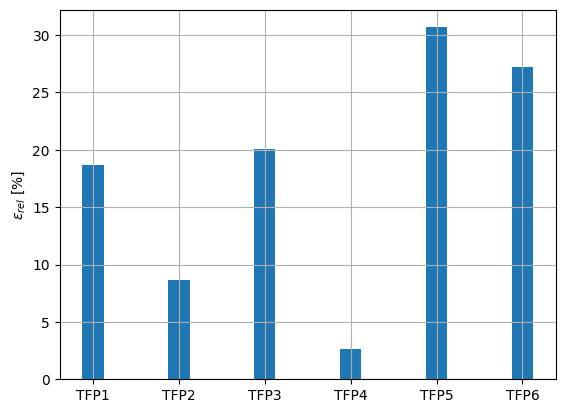

In [116]:
# plot bar error
fig, ax = plt.subplots()

ax.bar(x, 100*error_rel, width, label='Error')

ax.set_xticks(x);
ax.set_xticklabels(names)
plt.grid()
plt.ylabel(r"$\varepsilon_{rel} \ [\%]$")